In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ներբեռնենք տվյալները
data = pd.read_csv("/content/drive/MyDrive/archive.zip")

In [28]:
#Տվյալների սկզբնական չափերը
data.shape

(2900, 8)

In [78]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [24]:
data.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

Տվյալների սյուները իրենց համապատասխան տիպերով՝
Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency-numeric,

Stage_fear,Drained_after_socializing,Personality-categorical

In [100]:
# սյուների վիճակագրական ամփոփ տվյալներ
data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [84]:
# Հեռացնենք բացակայող տվյալներով տողերը
data_cleaned = data.dropna()

In [85]:
# Կատեգորիկ փոփոխականները դարձրել ենք թվային
data_cleaned['Drained_after_socializing'] = data_cleaned['Drained_after_socializing'].map({"Yes" : 1, "No" : 0})
data_cleaned['Stage_fear'] = data_cleaned['Stage_fear'].map({"Yes" : 1, "No" : 0})
data_cleaned['Personality'] = data_cleaned['Personality'].map({"Extrovert" : 1, "Introvert" : 0})

<ipython-input-85-d5802c4343c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Drained_after_socializing'] = data_cleaned['Drained_after_socializing'].map({"Yes" : 1, "No" : 0})
<ipython-input-85-d5802c4343c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Stage_fear'] = data_cleaned['Stage_fear'].map({"Yes" : 1, "No" : 0})
<ipython-input-85-d5802c4343c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Text(0, 0.5, 'Friends_circle_size')

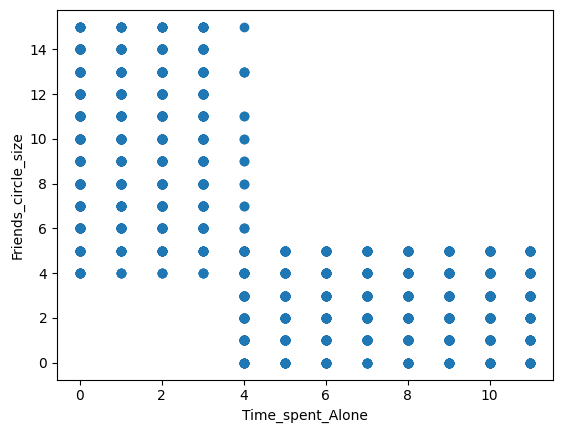

In [87]:
# Փորձել եմ վիզուալիզացնել փոփոխականները,բայց քանի որ դրանք շատ ուճեղ կորելացված են,
# շատ բարդ է որևէ հետևություն անել պատկերից
plt.scatter(data_cleaned['Time_spent_Alone'], data_cleaned['Friends_circle_size'])
plt.xlabel('Time_spent_Alone')
plt.ylabel('Friends_circle_size')

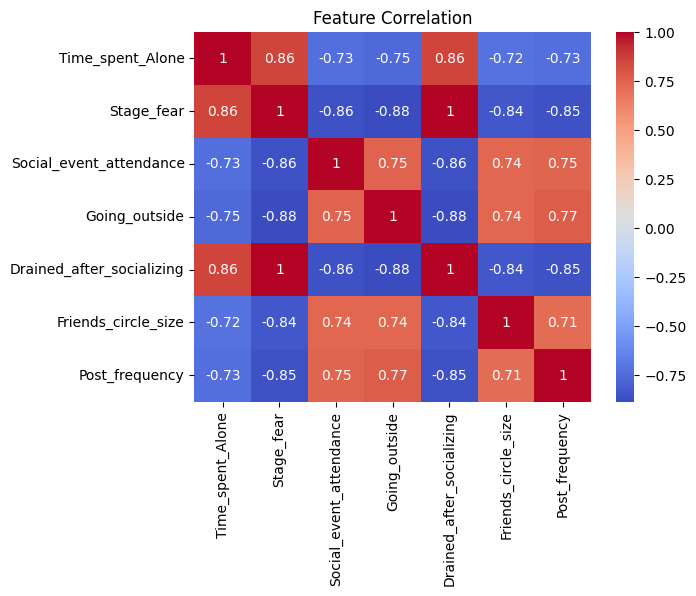

In [101]:
import seaborn as sns

corr = data_cleaned.drop('Personality', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [86]:
data_cleaned.corr()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1.000000,0.859675,-0.733520,-0.753479,0.859675,-0.717649,-0.734291,-0.702716
Stage_fear,0.859675,1.000000,-0.861230,-0.883345,1.000000,-0.836447,-0.854548,-0.850919
Social_event_attendance,-0.733520,-0.861230,1.000000,0.752775,-0.861230,0.738690,0.748494,0.713933
Going_outside,-0.753479,-0.883345,0.752775,1.000000,-0.883345,0.738999,0.772445,0.732499
Drained_after_socializing,0.859675,1.000000,-0.861230,-0.883345,1.000000,-0.836447,-0.854548,-0.850919
Friends_circle_size,-0.717649,-0.836447,0.738690,0.738999,-0.836447,1.000000,0.713145,0.683891
Post_frequency,-0.734291,-0.854548,0.748494,0.772445,-0.854548,0.713145,1.000000,0.713740
Personality,-0.702716,-0.850919,0.713933,0.732499,-0.850919,0.683891,0.713740,1.000000


In [89]:
# Հեռացրել եմ outlier-ները՝ օգտվելով boxplot-ի outlier-ի սահմանումից
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data_cleaned[~((data_cleaned < (Q1 - 1.5 * IQR)) &(data_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]


In [91]:
# Մաքրված տվյալների չափերը
data_cleaned.shape

(2477, 8)

In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,StratifiedKFold,cross_val_predict
from sklearn.model_selection import train_test_split
y = data_cleaned['Personality']
x = data_cleaned.drop(['Personality'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,confusion_matrix, ConfusionMatrixDisplay

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='lbfgs')
)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')
print("Cross-validation-ի արդյունքները:", scores)
print(f"Միջին ճշգրտությունը: {scores.mean():.3f}")
print(f"Ստանդարտ շեղում: {scores.std():.3f}")

Cross-validation-ի արդյունքները: [0.90927419 0.93548387 0.92121212 0.92727273 0.93333333]
Միջին ճշգրտությունը: 0.925
Ստանդարտ շեղում: 0.009


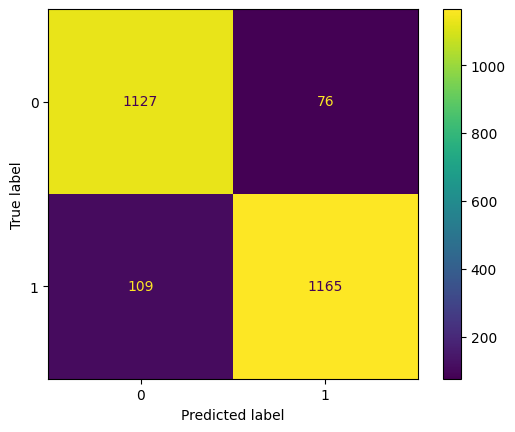

In [166]:
y_pred = cross_val_predict(model, x, y, cv=5)
cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [168]:
from sklearn.svm import SVC

x_train_svc, x_test_svc, y_train_svc, y_test_svc = train_test_split(x, y, test_size = 0.2, random_state = 52)
clf = SVC(kernel='rbf')
clf.fit(x_train_svc, y_train_svc)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=62)

scores = cross_val_score(clf, x, y, cv=cv, scoring='accuracy')
print("Cross-validation-ի արդյունքները:", scores)
print(f"Միջին ճշգրտությունը: {scores.mean():.3f}")
print(f"Ստանդարտ շեղում: {scores.std():.3f}")

Cross-validation-ի արդյունքները: [0.92741935 0.9233871  0.91919192 0.91919192 0.93737374]
Միջին ճշգրտությունը: 0.925
Ստանդարտ շեղում: 0.007


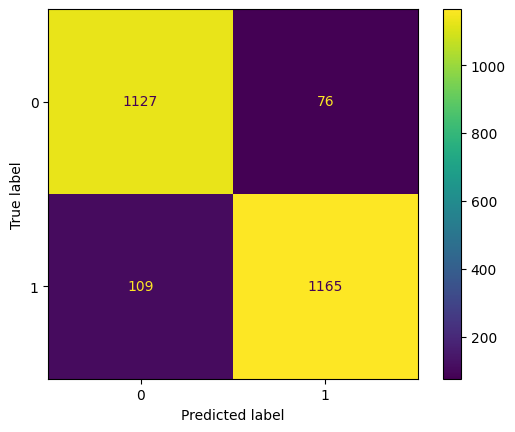

In [169]:
y_pred = cross_val_predict(clf, x, y, cv=5)
cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [116]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = DecisionTreeClassifier(criterion='gini',max_depth=5,
    min_samples_split=2,min_samples_leaf=1,
    max_features=None,
    random_state=52
)
x_train_dec, x_test_dec, y_train_dec, y_test_dec = train_test_split(x, y, test_size = 0.2, random_state = 62)

dec_clf.fit(x_train_dec,y_train_dec)

DecisionTreeClassifier(max_depth=5, random_state=52)

In [157]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)
scores = cross_val_score(dec_clf, x, y, cv=cv, scoring='accuracy')
print("Cross-validation-ի արդյունքները:", scores)
print(f"Միջին ճշգրտությունը: {scores.mean():.3f}")
print(f"Ստանդարտ շեղում: {scores.std():.3f}")


Cross-validation-ի արդյունքները: [0.93346774 0.9233871  0.92121212 0.92929293 0.91515152]
Միջին ճշգրտությունը: 0.925
Ստանդարտ շեղում: 0.006


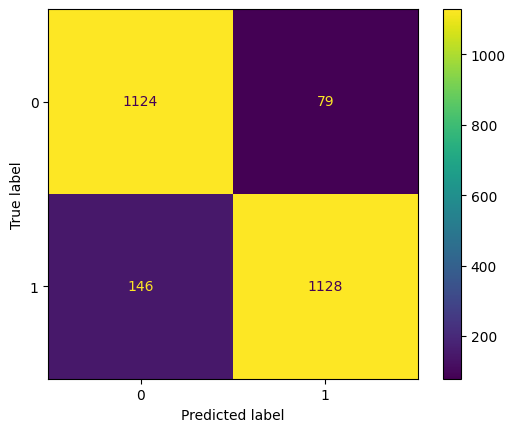

In [170]:
y_pred = cross_val_predict(dec_clf, x, y, cv=5)
cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [133]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x, y, test_size = 0.2, random_state = 22)

knn.fit(x_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=6)

In [159]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)
scores = cross_val_score(knn, x, y, cv=cv, scoring='accuracy')
print("Cross-validation-ի արդյունքները:", scores)
print(f"Միջին ճշգրտությունը: {scores.mean():.3f}")
print(f"Ստանդարտ շեղում: {scores.std():.3f}")


Cross-validation-ի արդյունքները: [0.92943548 0.91532258 0.92323232 0.92323232 0.90909091]
Միջին ճշգրտությունը: 0.920
Ստանդարտ շեղում: 0.007


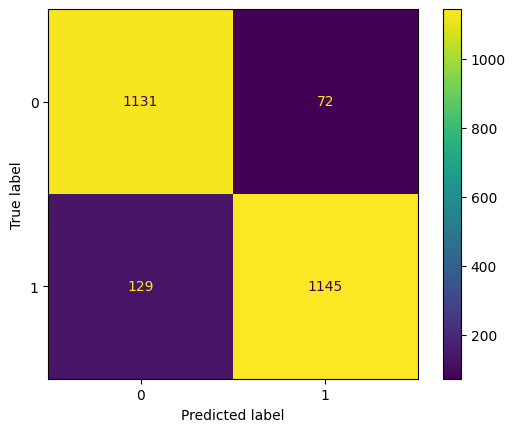

In [171]:
y_pred = cross_val_predict(knn, x, y, cv=5)
cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [140]:
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier(n_estimators=200,criterion='gini',random_state=100,max_depth=None, min_samples_split=2,
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features='sqrt')
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x, y, test_size = 0.2, random_state = 32)

r_forest.fit(x_train_rf, y_train_rf)
y_pred_rf = r_forest.predict(x_test_rf)


In [160]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)
scores = cross_val_score(r_forest, x, y, cv=cv, scoring='accuracy')
print("Cross-validation-ի արդյունքները:", scores)
print(f"Միջին ճշգրտությունը: {scores.mean():.3f}")
print(f"Ստանդարտ շեղում: {scores.std():.3f}")


Cross-validation-ի արդյունքները: [0.9375     0.9233871  0.92121212 0.92727273 0.91515152]
Միջին ճշգրտությունը: 0.925
Ստանդարտ շեղում: 0.007


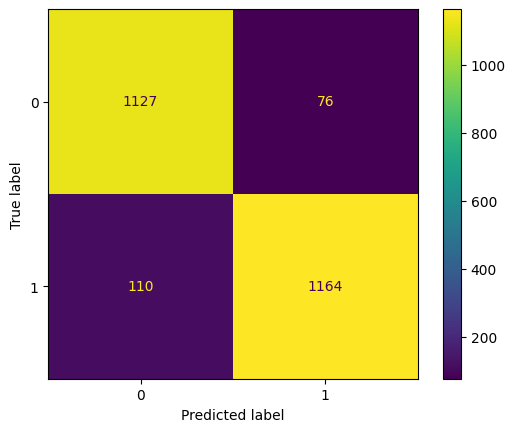

In [172]:
y_pred = cross_val_predict(r_forest, x, y, cv=5)
cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()